In [1]:
#!/usr/bin/python
import time
import matplotlib as ml
import matplotlib.pyplot as plt
import numpy as np 
from types import *
from numpy import array
%pylab inline
import pylayers.measures.vna.E5072A as E5072A

Populating the interactive namespace from numpy and matplotlib


In [2]:
vna = E5072A.SCPI("129.20.33.201",verbose=False)

error: [Errno 113] No route to host

In [3]:
# open remote measurement device (replace "hostname" by its actual name)
data = vna.getIdent()
print "Instrument ID : ",data

Instrument ID :  


In [4]:
vna.select(param='S21',chan=1)

error: [Errno 32] Relais brisé (pipe)

In [5]:
com =":SWE:POIN 1201"
vna.write(com)

NameError: name 'vna' is not defined

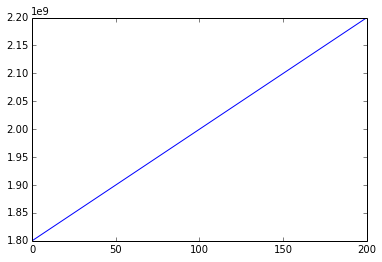

In [176]:
com = ":SENS1:FREQ:DATA?\n"
tab = vna.read(com)
f = np.frombuffer(tab,'>f8')
freq = f[1:]
plt.plot(freq)

In [177]:
try:
    del res
except:
    pass
com1 = "FORM:DATA REAL"
com2 = "TRIG:SING"
vna.write(com1)
vna.write(com2)
u = np.arange(0,201)*2
v = np.arange(0,201)*2+1
com = ":CALC1:DATA:SDAT?\n"
N = 50
for k in range(N):  
    B = vna.read(com)
    S =np.frombuffer(B[0:201*16],dtype='>f8')
    S21= S[u]+1j*S[v]
    try:
        res = np.vstack((res,S21.T))
    except:
        res = S21.T

In [154]:
from scipy.fftpack import fft,ifft,fftshift

In [165]:
fres=ifft(res,axis=1)

In [166]:
np.shape(res)

(50, 201)

In [167]:
R=np.mean(res,axis=0)

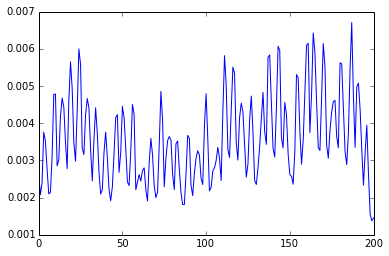

In [168]:
plt.plot(abs(R))

In [169]:
r = ifft(R)

In [170]:
t = np.linspace(0,201/(2.2-1.8),201)

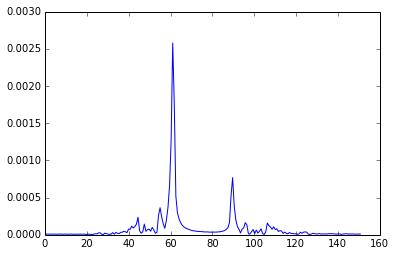

In [171]:
plt.plot(t*0.3,fftshift(abs(r)))

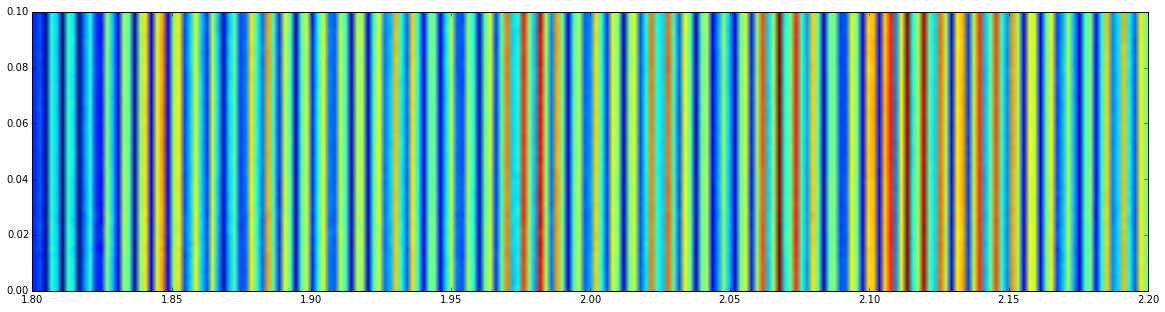

In [178]:
plt.figure(figsize=(20,10))
plt.imshow(abs(res),extent=(1.8,2.2,0,.1),origin='lower')

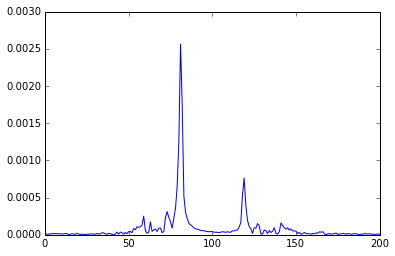

In [100]:
plt.plot(fftshift(abs(fres[0,:])))

In [25]:
3238-3216

22

In [29]:
len(S[22:])

3216

In [40]:
S21=np.frombuffer(S[0:201*16],dtype='>f8')

In [41]:
len(S21)

402

In [45]:
u = np.arange(0,201)*2
v = np.arange(0,201)*2+1

In [46]:
cS21= S21[u]+1j*S21[v]

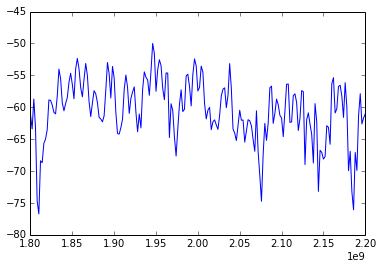

In [51]:
plt.plot(freq,20*np.log10(abs(cS21)))

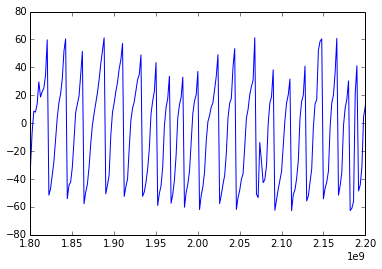

In [53]:
plt.plot(freq,20*np.angle(cS21))

In [85]:
import numpy as np
f = np.frombuffer(tab,dtype='>i2')

ValueError: buffer size must be a multiple of element size

In [111]:
201*8

1608

In [53]:
fr=vna.getfreq()

KeyboardInterrupt: 

In [7]:
S=vna.getnpoints()

In [8]:
vna.s.send(":SENS1:SWE:POIN?\n")

17

In [9]:
vna.s.recv(56)

'000000E+009,+1.80200000000E+009,+1.80400000000E+009,+1.8'

In [12]:
S=vna.getdata()

201


ValueError: buffer too small for requested bytes

In [1]:
import pylayers.measures.switch.ni_usb_6501 as sw
switch = sw.get_adapter()
if not switch:
    raise Exception("No device found")
switch.set_io_mode(0b11111111, 0b11111111, 0b00000000)


'\x00\x08\x01\x00\x00\x00\x00\x02'

In [4]:
switch.write_port(0,0b00000101)

'\x00\x08\x01\x00\x00\x00\x00\x02'

In [19]:
eval('0b100')

4